# Task Details

A company's market values are variable and affected by different factors. The most important factor could be the thoughts of the public. In this task, we will analyze the effect of public opinion about a company on that company's market values.

In [1]:
import numpy as np
import pandas as pd

## Data and Approach

In this notebook we'll try to first calculate an engangement score for the tweets in the database, filter out the ones with less impact, and classify each post as either Positive , Negetive or Neutral and lastly plot and compare how the price of the company varies after the post was made.

### Data

We import data containing tweets about the company between 2015 - 2020



In [2]:
company_tweet = pd.read_csv('/content/Company_Tweet.csv')
tweet = pd.read_csv('/content/Tweet.csv')
company = pd.read_csv('/content/Company.csv')

In [3]:
company

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [4]:
tweet

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0.0,0.0,1.0
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0.0,0.0,0.0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0.0,0.0,0.0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0.0,0.0,1.0
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0.0,0.0,1.0
...,...,...,...,...,...,...,...
2911750,1070845483789242368,Anthmoceri,1544144433,Join @RobinhoodApp and we'll both get a stock ...,0.0,0.0,1.0
2911751,1070846469735899141,permabear_uk,1544144668,"Frankly, I'd just hold to the big round number...",1.0,0.0,0.0
2911752,1070846516779212801,JxTheOne,1544144679,$TSLA supported by 10ma daily and trend line. ...,1.0,0.0,0.0
2911753,1070847034167574528,zen_n_trade,1544144802,$TSLA Is ready to blast to 400+,0.0,1.0,6.0


In [5]:
company_tweet

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


In [6]:
tweets = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")


In [7]:
total = tweets["comment_num"] + tweets["retweet_num"] + tweets["like_num"]
tweets["total_engangement"] = total



In [8]:
import datetime
tweets["Date"] = pd.to_datetime(tweets['post_date'],unit='s').dt.strftime('%d-%m-%Y')
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,total_engangement,Date
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0.0,0.0,1.0,1.0,01-01-2015
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0.0,0.0,1.0,1.0,01-01-2015
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0.0,0.0,1.0,1.0,01-01-2015
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0.0,0.0,1.0,1.0,01-01-2015
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0.0,0.0,1.0,1.0,01-01-2015


In [9]:
tweets

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,total_engangement,Date
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0.0,0.0,1.0,1.0,01-01-2015
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0.0,0.0,1.0,1.0,01-01-2015
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0.0,0.0,1.0,1.0,01-01-2015
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0.0,0.0,1.0,1.0,01-01-2015
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0.0,0.0,1.0,1.0,01-01-2015
...,...,...,...,...,...,...,...,...,...,...
3375594,1070843240633393152,TSLA,passthebeano,1544143898,And not tell $TSLA share holders?@SF_SEC,1.0,0.0,1.0,2.0,07-12-2018
3375595,1070843464638713858,TSLA,Butters2006,1544143951,Considering $TSLA just had their second bigges...,0.0,0.0,0.0,0.0,07-12-2018
3375596,1070846469735899141,TSLA,permabear_uk,1544144668,"Frankly, I'd just hold to the big round number...",1.0,0.0,0.0,1.0,07-12-2018
3375597,1070846516779212801,TSLA,JxTheOne,1544144679,$TSLA supported by 10ma daily and trend line. ...,1.0,0.0,0.0,1.0,07-12-2018


### Filter

We filter out the posts that did not gain much attention and so are likely to have less of an impact.

In [10]:
filtered = tweets.loc[tweets["total_engangement"] > 53]
#  200 here is an artbitrary number, feel free to choose any number here
filtered.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,total_engangement,Date
40,550781053137616896,AAPL,CNBC,1420151410,This is Wall Street's top pick in 2015. Hint: ...,5.0,37.0,22.0,64.0,01-01-2015
47,550779709840445441,AAPL,WSJ,1420151090,"See how tech companies like Apple, Twitter and...",15.0,223.0,109.0,347.0,01-01-2015
242,550650451948212224,AAPL,greatspoke,1420120272,Top Stock Analyst Releases Report on Top Stock...,0.0,431.0,2.0,433.0,01-01-2015
243,550650235404701697,AAPL,greatspoke,1420120221,Analyst Report on Top Stock Market Options for...,0.0,430.0,3.0,433.0,01-01-2015
244,550650235404701697,AMZN,greatspoke,1420120221,Analyst Report on Top Stock Market Options for...,0.0,430.0,3.0,433.0,01-01-2015


We then drop the "post_date" column as we no longer need it 


In [11]:
filtered = filtered.drop(labels="post_date" ,axis=1)
filtered.head()

,tweet_id,ticker_symbol,writer,body,comment_num,retweet_num,like_num,total_engangement,Date
40,550781053137616896,AAPL,CNBC,This is Wall Street's top pick in 2015. Hint: ...,5.0,37.0,22.0,64.0,01-01-2015
47,550779709840445441,AAPL,WSJ,"See how tech companies like Apple, Twitter and...",15.0,223.0,109.0,347.0,01-01-2015
242,550650451948212224,AAPL,greatspoke,Top Stock Analyst Releases Report on Top Stock...,0.0,431.0,2.0,433.0,01-01-2015
243,550650235404701697,AAPL,greatspoke,Analyst Report on Top Stock Market Options for...,0.0,430.0,3.0,433.0,01-01-2015
244,550650235404701697,AMZN,greatspoke,Analyst Report on Top Stock Market Options for...,0.0,430.0,3.0,433.0,01-01-2015


We then sort from largest to smallest to select the tweets with largest engangement

In [12]:
filtered = filtered.sort_values(["total_engangement"] , ascending = False)
filtered

,tweet_id,ticker_symbol,writer,body,comment_num,retweet_num,like_num,total_engangement,Date
474137,692169663577485315,AAPL,ValaAfshar,Apple has $216 billion in cash. It could buy a...,42.0,984.0,677.0,1703.0,27-01-2016
761280,770310550991605760,AAPL,cnntech,Apple's next iPhone will likely be unveiled Se...,11.0,729.0,918.0,1658.0,29-08-2016
99172,575014851363405824,AAPL,RANsquawk,Loving my Apple Watch $AAPL,66.0,882.0,654.0,1602.0,09-03-2015
2303834,816359802733555712,AMZN,DavidSchawel,Sometimes hard to wrap your head around $AMZN,14.0,646.0,900.0,1560.0,03-01-2017
2340420,854690001866686464,TSLA,philstockworld,"Will We Hold It Wednesday - Nasdaq 5,400 Editi...",0.0,969.0,520.0,1489.0,19-04-2017
...,...,...,...,...,...,...,...,...,...
3012869,878672603724079105,TSLA,QTRResearch,Study: Tesla car battery production releases a...,11.0,15.0,28.0,54.0,24-06-2017
3313882,1047151390022225927,TSLA,OptionsGod1,"hey $TSLA shorts, hourly chart telling me that...",7.0,6.0,41.0,54.0,02-10-2018
3025534,889584171982704642,TSLA,ihors3,"$TSLA short interest is $9.5 billion, up $522 ...",8.0,17.0,29.0,54.0,24-07-2017
3028742,892793897868558338,TSLA,Stocktwits,Yo it's about to get hyphy. Earnings TODAY at ...,1.0,29.0,24.0,54.0,02-08-2017


In [13]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [14]:
#Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

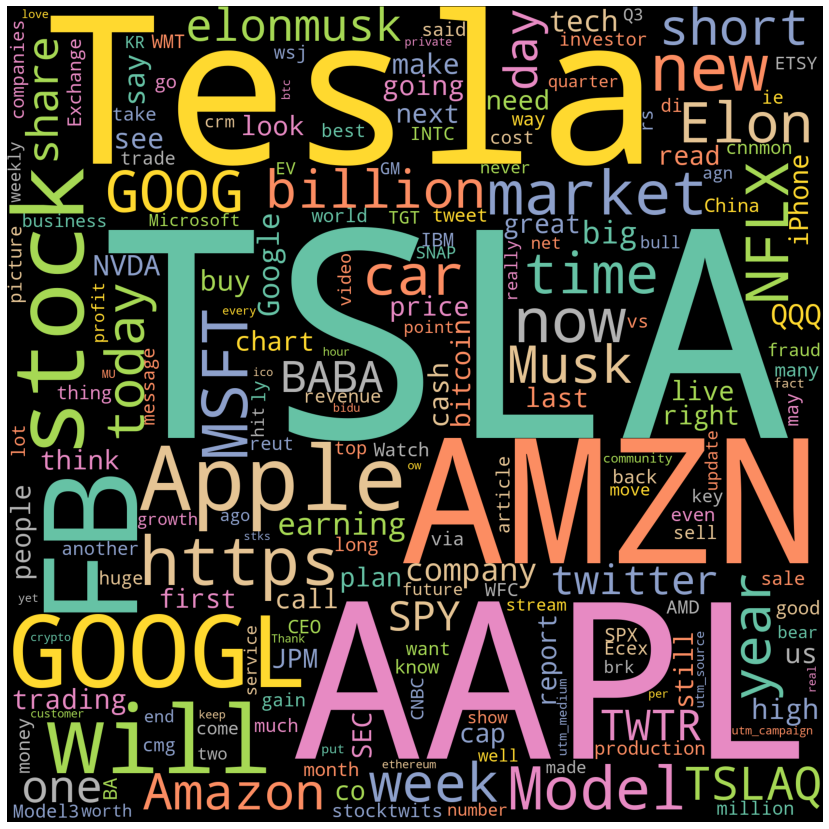

In [17]:
mask = np.array(Image.open('/content/twitterlogo.png'))
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(' '.join(filtered['body']))
# Plot
plot_cloud(wordcloud)


# Sentimental Analysis

We shall use vanderSentiment to determine the sentiment of each post. It has been for social media sentiment analysis and so makes it the best option in our case.

Feel free to check out the github page at https://github.com/cjhutto/vaderSentiment

In [19]:
# installing a sentiment analysier

!pip install vaderSentiment

## Making the Sentiment function

we shall now make a function that takes in text and returns the sentiment of that text. 

In [20]:
def getSentiment(body):
    
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    
    assert body is not None
    vs = analyzer.polarity_scores(body)
    score = vs['compound']
    
    if (score >= 0.05): 
        return "Positive"
    
    elif (score < 0.05 and score > -0.05):
        return "Neutral"
    
    elif (score <= -0.05):    
        return "Negative"
    
    print(score)

## Applying the Function

We now use the function we have made to add sentiment to every tweet.

In [21]:
filtered['Sentiment'] = filtered['body'].apply(lambda x: getSentiment(x))
filtered

,tweet_id,ticker_symbol,writer,body,comment_num,retweet_num,like_num,total_engangement,Date,Sentiment
474137,692169663577485315,AAPL,ValaAfshar,Apple has $216 billion in cash. It could buy a...,42.0,984.0,677.0,1703.0,27-01-2016,Neutral
761280,770310550991605760,AAPL,cnntech,Apple's next iPhone will likely be unveiled Se...,11.0,729.0,918.0,1658.0,29-08-2016,Neutral
99172,575014851363405824,AAPL,RANsquawk,Loving my Apple Watch $AAPL,66.0,882.0,654.0,1602.0,09-03-2015,Positive
2303834,816359802733555712,AMZN,DavidSchawel,Sometimes hard to wrap your head around $AMZN,14.0,646.0,900.0,1560.0,03-01-2017,Negative
2340420,854690001866686464,TSLA,philstockworld,"Will We Hold It Wednesday - Nasdaq 5,400 Editi...",0.0,969.0,520.0,1489.0,19-04-2017,Neutral
...,...,...,...,...,...,...,...,...,...,...
3012869,878672603724079105,TSLA,QTRResearch,Study: Tesla car battery production releases a...,11.0,15.0,28.0,54.0,24-06-2017,Neutral
3313882,1047151390022225927,TSLA,OptionsGod1,"hey $TSLA shorts, hourly chart telling me that...",7.0,6.0,41.0,54.0,02-10-2018,Negative
3025534,889584171982704642,TSLA,ihors3,"$TSLA short interest is $9.5 billion, up $522 ...",8.0,17.0,29.0,54.0,24-07-2017,Positive
3028742,892793897868558338,TSLA,Stocktwits,Yo it's about to get hyphy. Earnings TODAY at ...,1.0,29.0,24.0,54.0,02-08-2017,Neutral


We see that now the posts have been classifed into three types:

* Positive    
* Neutral     
* Negative


In [22]:
filtered["Sentiment"].value_counts()
# removing Neutral Statements as they have no affect.

Positive    8149
Neutral     5707
Negative    4191
Name: Sentiment, dtype: int64

We then remove the Neutral tweets as they do not intend to have an effect on the stock price.

In [23]:
filtered = filtered.loc[filtered["Sentiment"] != "Neutral"]
# removed all Neutral sentiment posts
filtered.head(15)

,tweet_id,ticker_symbol,writer,body,comment_num,retweet_num,like_num,total_engangement,Date,Sentiment
99172,575014851363405824,AAPL,RANsquawk,Loving my Apple Watch $AAPL,66.0,882.0,654.0,1602.0,09-03-2015,Positive
2303834,816359802733555712,AMZN,DavidSchawel,Sometimes hard to wrap your head around $AMZN,14.0,646.0,900.0,1560.0,03-01-2017,Negative
3200240,1021481848403382272,TSLA,QTRResearch,"Guys - I'm beside myself & before you ask, thi...",207.0,317.0,899.0,1423.0,23-07-2018,Negative
2357620,875518367003791362,AMZN,SJosephBurns,$AMZN has no stores $Uber no cars $FB creates ...,40.0,509.0,837.0,1386.0,16-06-2017,Negative
235457,613718497219076096,AAPL,Carl_C_Icahn,Sold last of our $NFLX today. Believe $AAPL c...,153.0,671.0,533.0,1357.0,24-06-2015,Positive
3338431,1054728662786826240,TSLA,CitronResearch,$TSLA dropping earnings on top of $F tomorrow ...,148.0,308.0,861.0,1317.0,23-10-2018,Negative
3196230,1020077355346169857,TSLA,vincent13031925,"Tesla Spokesperson, Regarding The Earlier Need...",38.0,256.0,986.0,1280.0,19-07-2018,Negative
3299807,1045404879341137921,TSLA,Reuters,SEC files lawsuit against Tesla CEO Elon Musk ...,56.0,630.0,585.0,1271.0,27-09-2018,Negative
2761061,1020036769629143040,MSFT,Microsoft,$MSFT Q4 EARNINGS Revenue: $30.1 billion 17%...,26.0,333.0,896.0,1255.0,19-07-2018,Negative
171193,593073924822343680,AAPL,Carl_C_Icahn,$AAPL is still undervalued and misunderstood. ...,113.0,597.0,506.0,1216.0,28-04-2015,Negative


In [24]:
import seaborn as sns

# Graphing The Result 

We import the stock price, and plot it against the date that the tweet was made.

In [25]:
prices = pd.read_csv('/content/CompanyValues.csv' )
# TODO: add function to parse datetime

prices['day_date'] = pd.to_datetime(prices["day_date"]).dt.strftime('%d-%m-%Y') # changing format
prices['day_date'] = pd.to_datetime(prices["day_date"])# assigning datetime data type

prices.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [26]:
prices

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.4700
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.6300
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.0900
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.5000
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.3500
...,...,...,...,...,...,...,...
17523,TSLA,2019-12-21,405.59,14785210,410.29,413.00,400.1850
17524,TSLA,2019-12-22,405.59,14785210,410.29,413.00,400.1850
17525,TSLA,2019-12-25,425.25,8054720,418.36,425.47,412.6875
17526,TSLA,2019-12-28,430.38,9956827,435.00,435.31,426.1100


We should make a general function to avoid having to write the same code again and again.



In [27]:
def getGraph(stock , date , daysBefore, daysAfter ):
    
    import datetime
    
    date = pd.to_datetime(date)
    
    
    start1 = date - datetime.timedelta(days=daysBefore)

    
    end1 = date + datetime.timedelta(days=daysAfter)
    
    temp = prices
    
    temp = temp.loc[prices["ticker_symbol"]  == stock]
    temp = temp.loc[temp["day_date"] > start1]
    temp = temp.loc[temp["day_date"] < end1]
    
    from matplotlib.pyplot import figure
    import matplotlib.pyplot as plt

    figure(figsize=(16, 10))
#     sns.set_style("tik")
    plt.xlabel("Date" , fontsize = 18)
    plt.ylabel(f"{stock} Price" , fontsize = 18)
    sns.lineplot(
    data = temp,
        x = 'day_date',
        y = 'open_value',
        color = 'green' , 
    )

    sns.lineplot(
    data = temp,
        x = 'day_date',
        y = 'close_value', 
        color = 'red'
    )
    plt.axvline(x=date , color = '#42E3BB')
    
    plt.legend(labels=["Day Open","Day Close" , "Date Posted" ],fontsize = 16)

In [28]:
filtered[:10][["ticker_symbol" ,"Sentiment" , "Date"]]


,ticker_symbol,Sentiment,Date
99172,AAPL,Positive,09-03-2015
2303834,AMZN,Negative,03-01-2017
3200240,TSLA,Negative,23-07-2018
2357620,AMZN,Negative,16-06-2017
235457,AAPL,Positive,24-06-2015
3338431,TSLA,Negative,23-10-2018
3196230,TSLA,Negative,19-07-2018
3299807,TSLA,Negative,27-09-2018
2761061,MSFT,Negative,19-07-2018
171193,AAPL,Negative,28-04-2015


1.  AAPL	Positive	09-03-2015
1.  AMZN	Negetive	03-01-2017
1.  TSLA	Negetive	23-07-2018
1.  AMZN	Negetive	16-06-2017
1.  AAPL	Positive	24-06-2015
1.  TSLA	Negetive	23-10-2018
1.  TSLA	Negetive	19-07-2018
1.  GOOG	Negetive	03-06-2019
1.  TSLA	Positive	26-11-2019
1.  TSLA	Negetive	27-09-2018

Now we shall take a look at the top ten tweets one by one

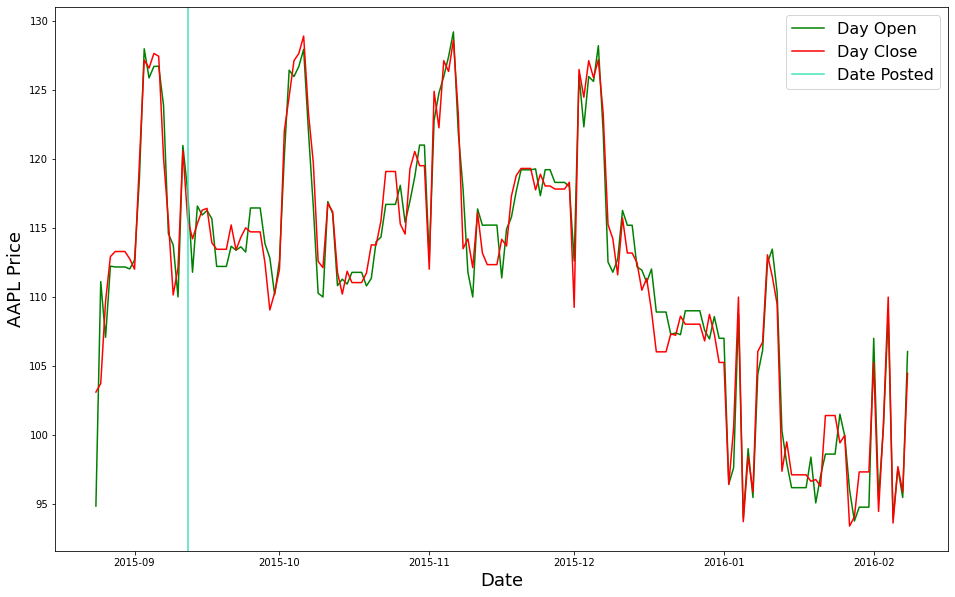

In [29]:
getGraph('AAPL' , '9-12-2015' , 20,  150) # 1 -- +  no

1. Looking at date at Price of AAPL the price remains unchanged and there appear to be ***no positive increase***.

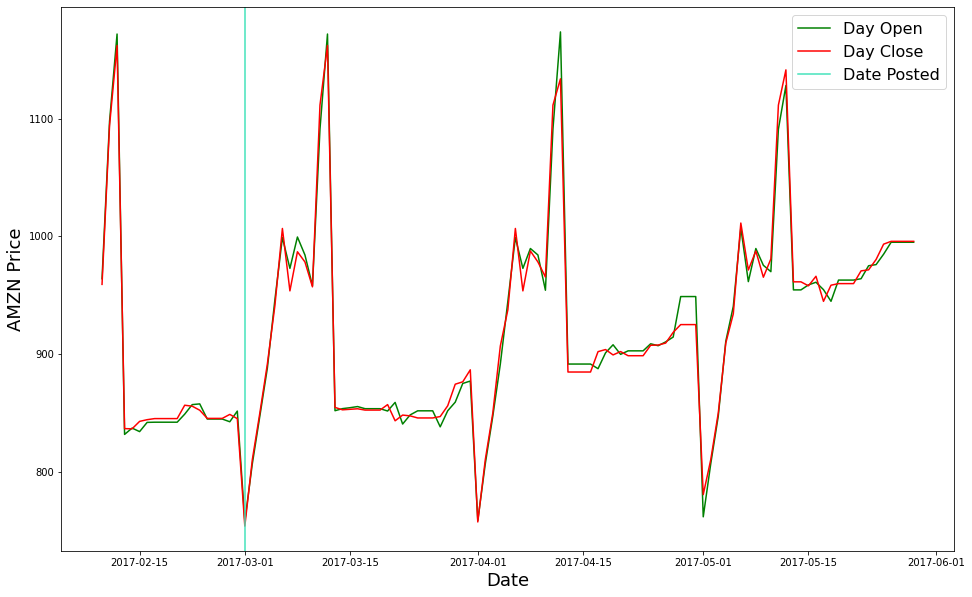

In [30]:
getGraph('AMZN' , '03-01-2017' , 20, 90 ) # 2 -- - no

2. Looking at date at Price of AMZN the price again remains unchanged and there appear to be ***no negative decrease***.

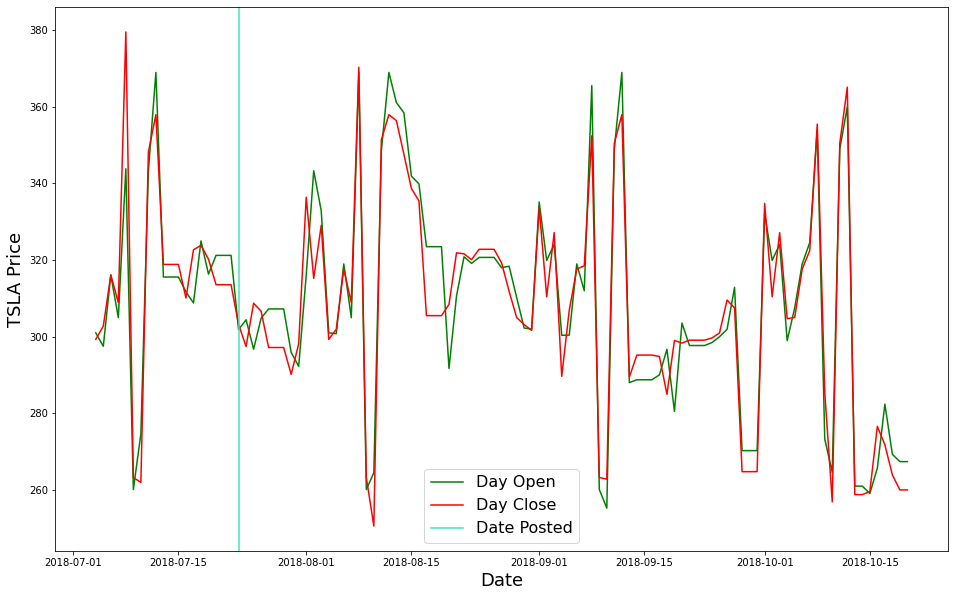

In [31]:
getGraph('TSLA' , '23-07-2018' , 20, 90 ) # 3 -- - yes

3. Here the negative sentiment seems to have taken effect and the ***price seems to have gone down*** breaking from pattern slightly.

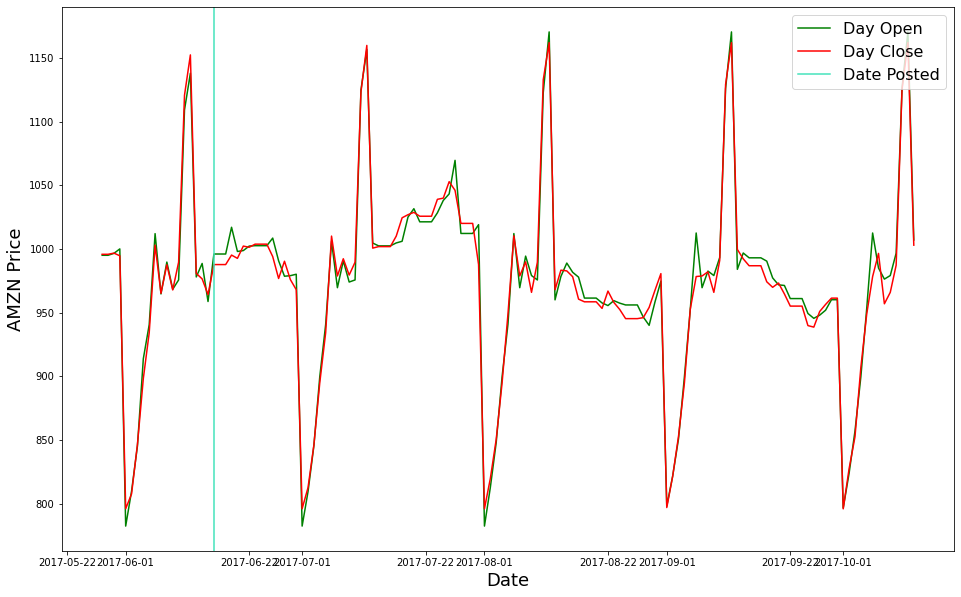

In [32]:
getGraph('AMZN', '16-06-2017' , 20, 120 ) # 4 -- - no

4. Here the tweets seems to have no effect and there is ***no negative decrease*** in the price.

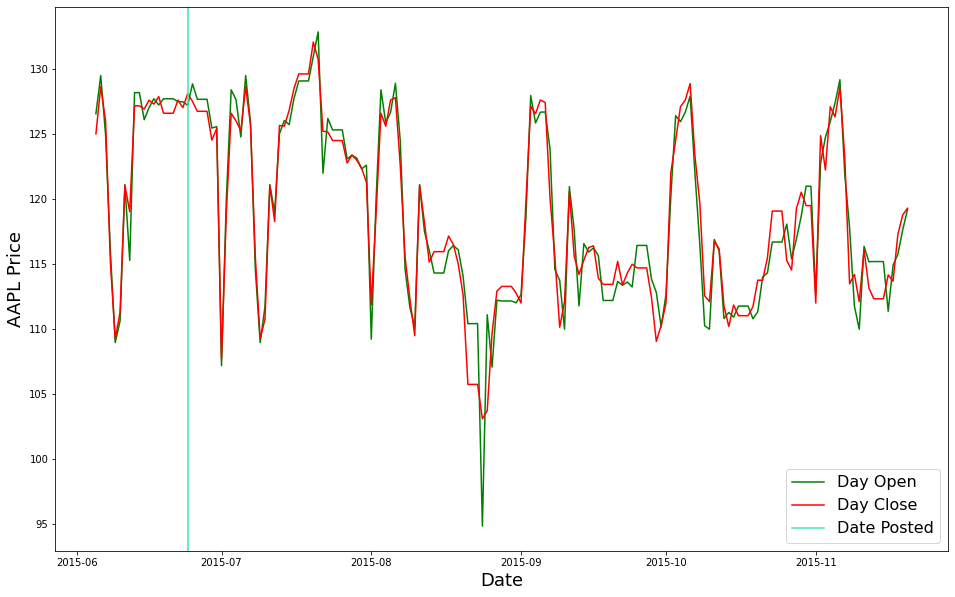

In [33]:
getGraph('AAPL', '24-06-2015' , 20, 150 ) # 5 -- + no

5. Here too there seems to be ***no*** ***positive increase*** in the price.

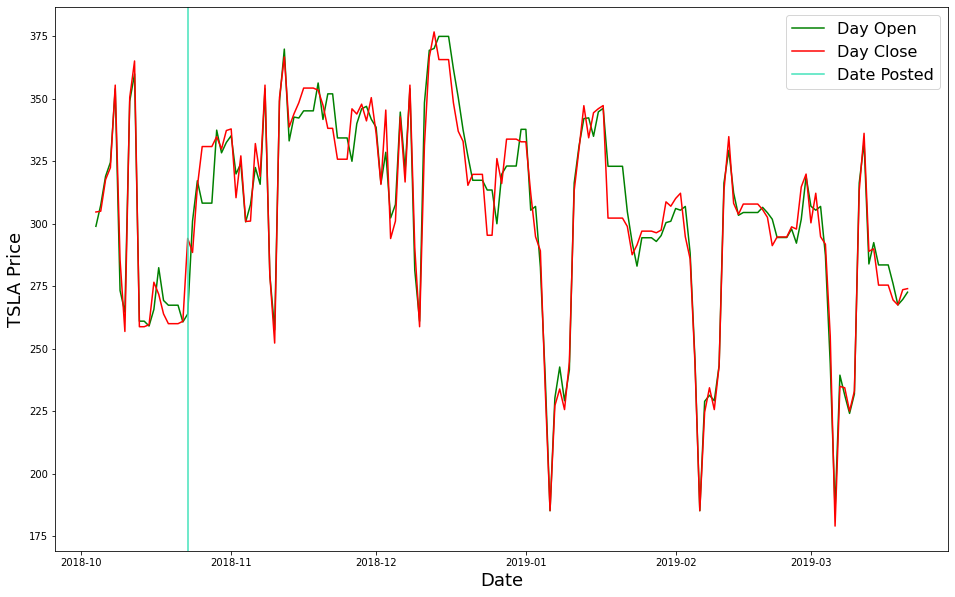

In [34]:
getGraph('TSLA' ,'23-10-2018' , 20, 150 ) # 6 -- - no

6. Again we see ***no negative decrease*** in the price after the tweet was made.

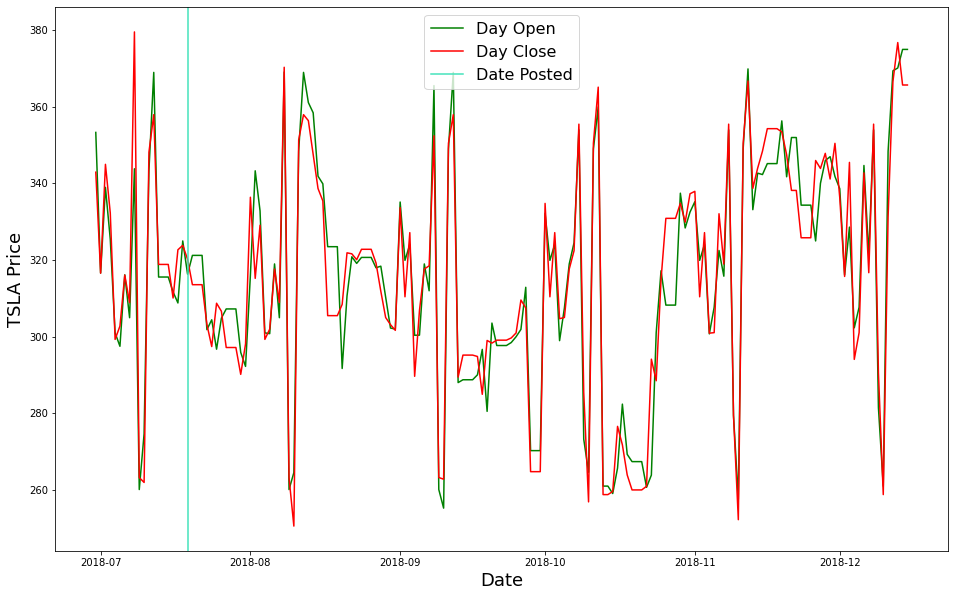

In [35]:
getGraph('TSLA' , '19-07-2018' , 20, 150 ) # 7 -- - yes

7. There does appear to be a ***slight drop in price*** after the tweet was made.

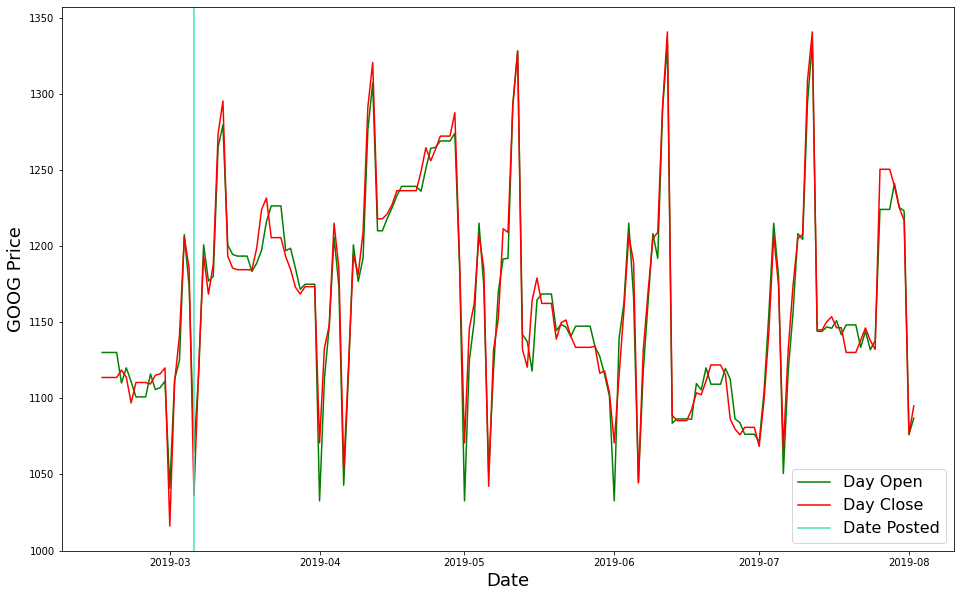

In [36]:
getGraph('GOOG' ,'03-06-2019' , 20, 150 ) # 8 -- - nothing

8. Here the tweet seems to have been made at the time of the price dip, and does not have an effect in lowering the price after the tweet was made.

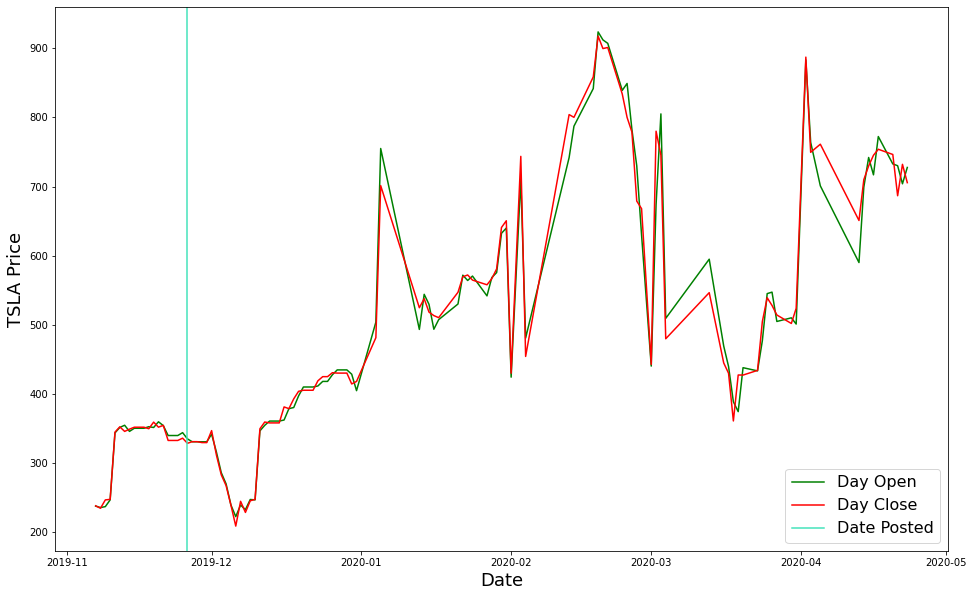

In [37]:
getGraph('TSLA' ,'26-11-2019' , 20, 150 ) # 9 -- - yes

9. The tweet seems to have had quite a considerable effect, as the ***price has risen by a substantial amount*** after just a few months.

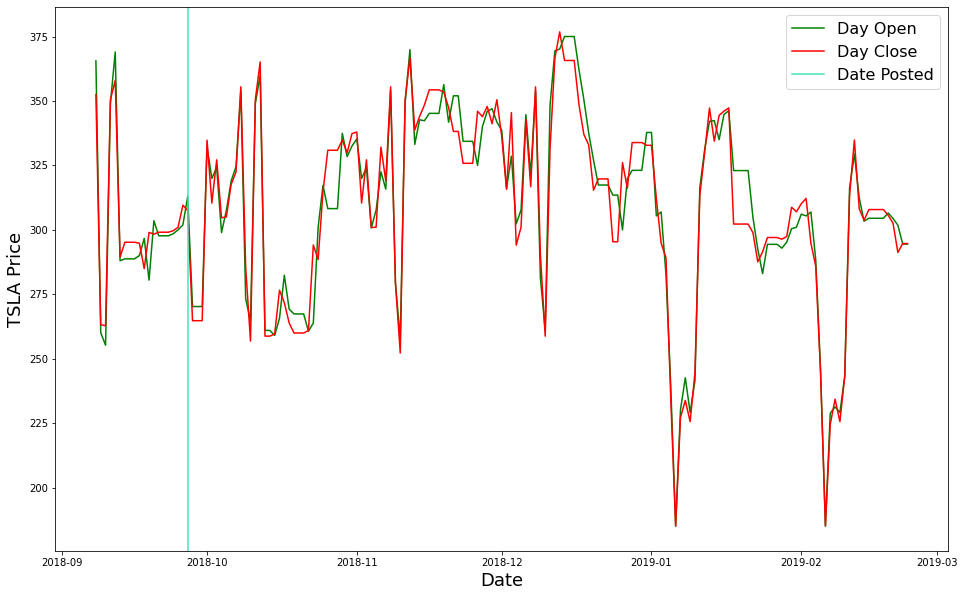

In [38]:
getGraph('TSLA', '27-09-2018' , 20, 150 ) # 10 -- - yes

10. This tweets too seems to have an effect as ***price does fall immediately*** after the tweet was made and ***overall price and trend also decreases***.

# Conclusion

Out of 10 of the most popular tweets only 4 (40%) had an effect on the stock market. 

So in conclusion, **Yes**, **twitter does have an effect on the stock market** but it is not nessecary that if your tweet does go viral it will raise or lower stock prices.

 



### Well thats it.
If there are any mistakes or any improvemnts I can make please do let me know.

Kind Regards,
